In [1]:
import pandas as pd

In [2]:
df = pd.read_pickle('data/s_mobile.pkl')

In [3]:
df.head()

,customer,churn,changer,changem,revenue,mou,overage,roam,conference,months,...,refurb,smartphone,highcreditr,mcycle,car,travel,region,occupation,training,representative
0,U86940794,yes,109,81,62,600,141,0,0,8,...,no,yes,no,no,no,no,CS,other,0.0,0
1,U56788559,no,0,3,54,146,0,0,0,8,...,no,yes,yes,no,no,no,SE,other,0.0,0
2,U47928407,no,0,-9,39,1158,96,0,1,9,...,no,yes,no,yes,no,yes,NW,professional,NaN,1
3,U75794640,no,0,-8,35,560,0,0,0,37,...,no,yes,yes,yes,no,no,NW,retired,1.0,0
4,U41010771,no,-2,-8,100,1888,112,9,0,20,...,no,yes,no,yes,yes,no,SW,other,NaN,1


In [4]:
df.shape

(69000, 25)

In [7]:
df.describe()

,changer,changem,revenue,mou,overage,roam,conference,months,uniqsubs,custcare,retcalls,dropvce,eqpdays,training,representative
count,69000.000000,69000.000000,69000.000000,69000.00000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,39000.000000,69000.000000
mean,8.596870,16.041449,56.959203,525.82229,64.076725,1.195493,0.276275,18.696507,1.526203,2.377652,0.035290,2.986913,526.235696,0.700000,0.434783
std,28.967754,51.427097,43.439200,530.02473,68.671857,9.083502,1.173325,9.729616,0.866405,4.253015,0.201412,4.539006,230.014550,0.458263,0.495732
min,-90.000000,-78.000000,0.000000,0.00000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000
25%,-2.000000,-9.000000,32.000000,159.00000,0.000000,0.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,367.000000,0.000000,0.000000
50%,0.000000,-1.000000,46.000000,366.00000,40.000000,0.000000,0.000000,16.000000,1.000000,0.000000,0.000000,2.000000,480.000000,1.000000,0.000000
75%,4.000000,27.000000,69.000000,722.00000,127.000000,0.000000,0.000000,24.000000,2.000000,3.000000,0.000000,4.000000,648.000000,1.000000,1.000000
max,437.000000,540.000000,1223.000000,7668.00000,283.000000,1112.000000,66.000000,61.000000,18.000000,32.000000,4.000000,111.000000,1982.000000,1.000000,1.000000


### Student Discount Plan

Assuming the prices of S-Mobile plans are high for students and that's why they have high churn rates. We plan to give them some student discount so to lower to lower their burden. 

In [96]:
s_mobile[s_mobile.representative == 1].groupby('occupation')['revenue'].mean()

occupation
other           61.790678
professional    51.852151
student         56.229141
retired         39.556346
Name: revenue, dtype: float64

In [82]:
# Mean monnthly churn rate for those above average churn in our data
student_churn = s_mobile.loc[(s_mobile.occupation== 'student') & (s_mobile.representative == 1)].churn_yes.mean()

print(f'The mean monthly churn rate for students in the representative data is {round(student_churn*100,2)}%')

The mean monthly churn rate for students in the representative data is 4.17%


In [85]:
# Mean monthly churn rate after setting eqpdays to 0

new_churn = lr.predict(s_mobile.loc[(s_mobile.occupation == 'student') & (s_mobile.representative == 1)].assign(occupation='professional')).mean()

print(f'The mean monthly churn rate for those whose occupation has been simulated to look like the Professionals in the representative data is {round(new_churn*100,2)}%')

The mean monthly churn rate for those whose occupation has been simulated to look like the Professionals in the representative data is 2.72%


In [86]:
print(f'The projected impact of our plan on churn is a reduction of {round((student_churn-new_churn)*100,2)}% for this subset of people')

The projected impact of our plan on churn is a reduction of 1.45% for this subset of people


In [87]:
rev = s_mobile.loc[(s_mobile.occupation == 'student') & (s_mobile.representative == 1)].revenue.mean()
ser_cost = 5
clv_old = clv_calculator(rev,ser_cost,student_churn)
clv_old

989.1274354362118

In [113]:
clv_new = clv_calculator(rev,ser_cost,new_churn, inc_cost=8)
clv_new

1091.5655757523891

In [114]:
diff = clv_new - clv_old

print(f'We can spend atmost {round(diff,2)} SGD per customer for the incentive today without incurring a loss')

We can spend atmost 102.44 SGD per customer for the incentive today without incurring a loss


In [115]:
target_perc = s_mobile.loc[(s_mobile.occupation == 'student') & (s_mobile.representative == 1)].shape[0] / s_mobile.loc[s_mobile.representative == 1].shape[0]

In [116]:
target_perc

0.05513333333333333

In [117]:
max_spend = target_perc * 1000000 * diff
max_spend

5647756.136098575

In [95]:
s_mobile[s_mobile.representative == 1].groupby('occupation')['revenue'].mean()

occupation
other           61.790678
professional    51.852151
student         56.229141
retired         39.556346
Name: revenue, dtype: float64

In [97]:
s_mobile[s_mobile.representative == 1].groupby('occupation')['mou'].mean()

occupation
other           587.501717
professional    420.444124
student         488.093712
retired         500.293476
Name: mou, dtype: float64

In [98]:
s_mobile[s_mobile.representative == 1].groupby('occupation')['overage'].mean()

occupation
other           65.520795
professional    50.315092
student         58.412334
retired         60.070463
Name: overage, dtype: float64

In [99]:
s_mobile[s_mobile.representative == 1].groupby('occupation')['roam'].mean()

occupation
other           1.299530
professional    1.034178
student         1.022975
retired         0.941163
Name: roam, dtype: float64

In [100]:
s_mobile[s_mobile.representative == 1].groupby('occupation')['retcalls'].mean()

occupation
other           0.029752
professional    0.022081
student         0.021161
retired         0.025386
Name: retcalls, dtype: float64

In [101]:
s_mobile[s_mobile.representative == 1].groupby('occupation')['custcare'].mean()

occupation
other           2.803837
professional    1.574117
student         2.382104
retired         2.429656
Name: custcare, dtype: float64

In [103]:
s_mobile[s_mobile.representative == 1].groupby('occupation')['eqpdays'].mean()

occupation
other           487.324261
professional    560.364823
student         512.508464
retired         543.881376
Name: eqpdays, dtype: float64

In [119]:
#Checking the impact of each variable

ct = rsm.cross_tabs(s_mobile.query('training == 1'),'travel','roam')
ct.summary()


Cross-tabs
Variables: travel, roam
Null hyp: there is no association between travel and roam
Alt. hyp: there is an association between travel and roam

Observed:

roam         0      1    2    3    4    5    6    7    8   9  ... 140 144 148  \
travel                                                        ...               
no      20,501  1,966  920  532  342  267  195  142  106  84  ...   1   1   1   
yes      1,228    108   43   31   21   15   17    9    7   6  ...   0   0   0   
Total   21,729  2,074  963  563  363  282  212  151  113  90  ...   1   1   1   

roam   166 172 178 179 201 692   Total  
travel                                  
no       1   1   1   1   1   1  25,777  
yes      0   0   0   0   0   0   1,523  
Total    1   1   1   1   1   1  27,300  

[3 rows x 99 columns]

Expected: (row total x column total) / total

roam            0        1       2       3       4       5       6       7  \
travel                                                                       

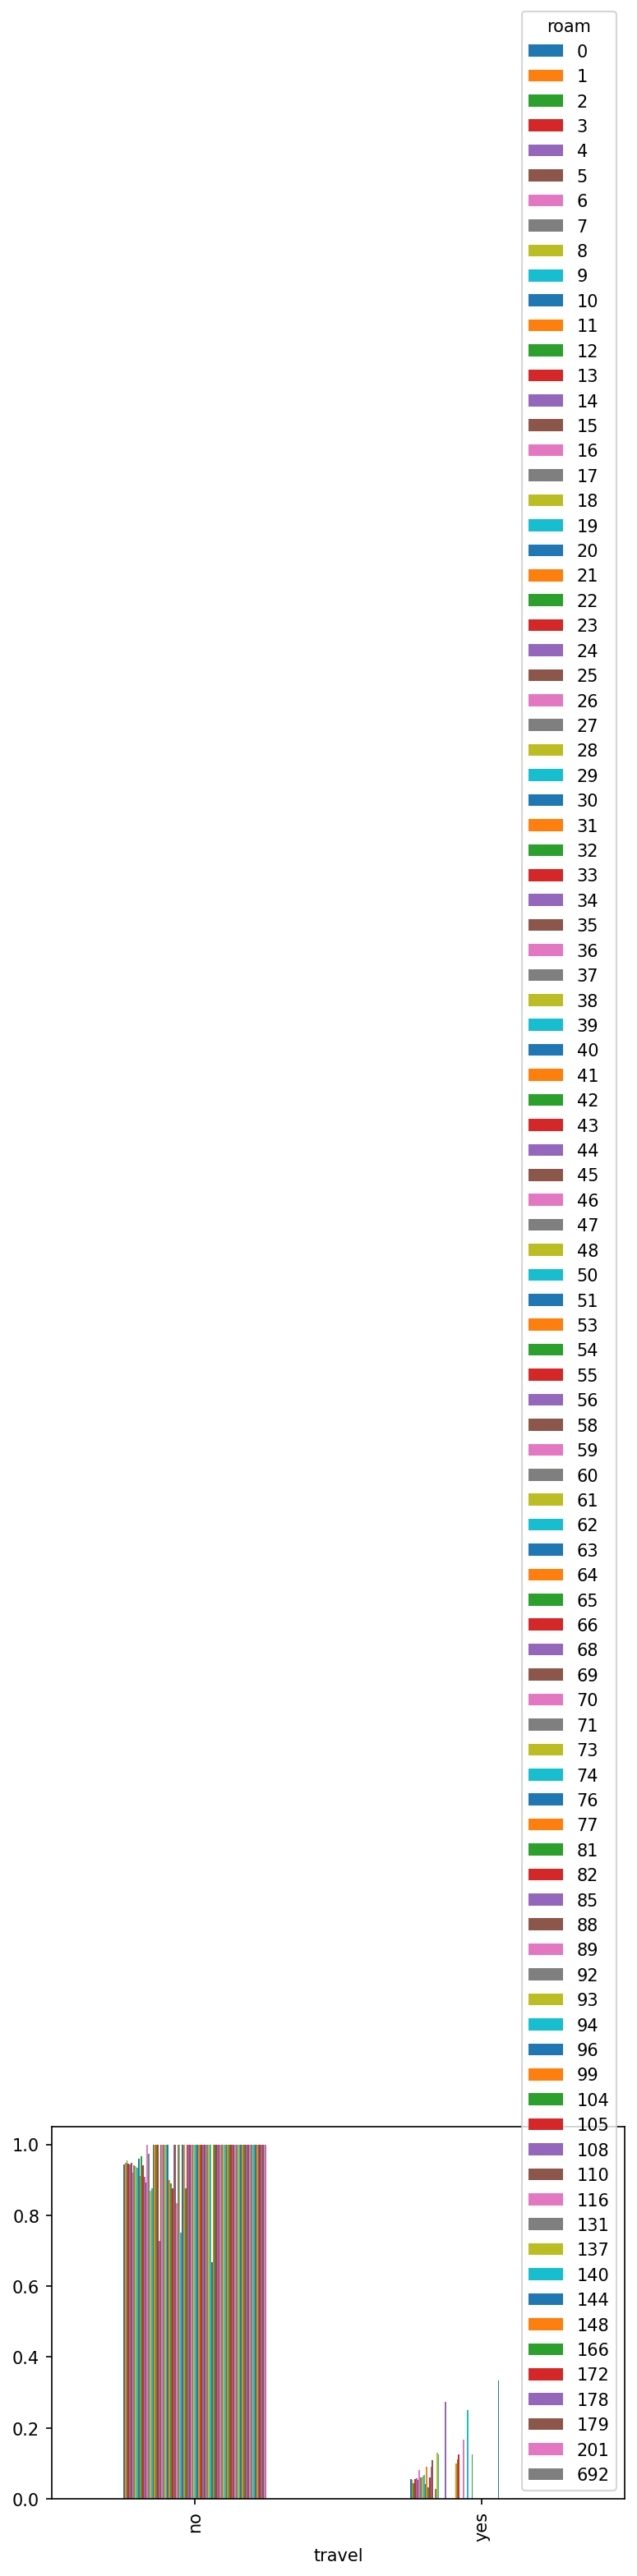

In [120]:
ct.plot()